In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

def detect_face(image):
    face_image = image.copy()
    #returns object which you can use to draw rectangles
    face_rectangles = face_cascade.detectMultiScale(face_image)
    
    #x and y position + width and height of rectangle
    for(x,y,w,h) in face_rectangles:
        cv2.rectangle(face_image,(x,y),(x+w,y+h),(255,255,255),10)
    return face_image


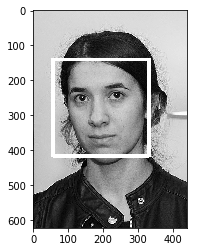

In [3]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

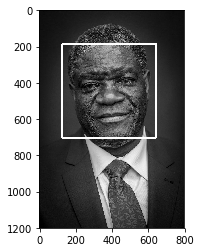

In [4]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

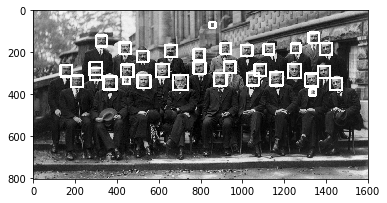

In [5]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

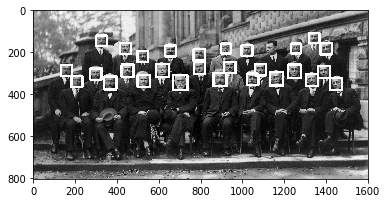

In [6]:
def adjusted_detect_face(image):
    face_image = image.copy()
    #returns object which you can use to draw rectangles
    face_rectangles = face_cascade.detectMultiScale(face_image,scaleFactor=1.2,
                                                   minNeighbors=5)
    
    #x and y position + width and height of rectangle
    for(x,y,w,h) in face_rectangles:
        cv2.rectangle(face_image,(x,y),(x+w,y+h),(255,255,255),10)
    return face_image

#trade-off: missing some faces which aren't looking at the camera
result = adjusted_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [7]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

def detect_eyes(image):
    face_image = image.copy()
    #returns object which you can use to draw rectangles
    eyes_rectangles = eye_cascade.detectMultiScale(face_image,scaleFactor=1.2,
                                                   minNeighbors=5)
    
    #x and y position + width and height of rectangle
    for(x,y,w,h) in eyes_rectangles:
        cv2.rectangle(face_image,(x,y),(x+w,y+h),(255,255,255),10)
    return face_image

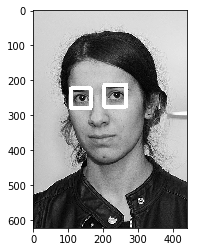

In [8]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

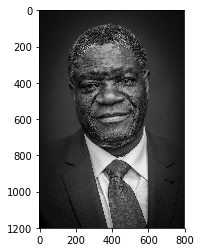

In [9]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')
#this didn't work because of the image quality. 
#Eyes can't be detected because of the darkened eyes

In [ ]:
#do the same from a camera
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    frame2 = detect_eyes(frame)
    
    cv2.imshow('Video Face Detection',frame)
    k=cv2.waitKey(1)
    if k ==27:
        break
        
cap.release()
cv2.destroyAllWindows()